In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cv2 as cv
from PIL import Image
from numpy import asarray
from sklearn.svm import SVC
from sklearn import metrics
from google.colab.patches import cv2_imshow
input2=['dailyROTIMap2021_092.mp4']

# Train

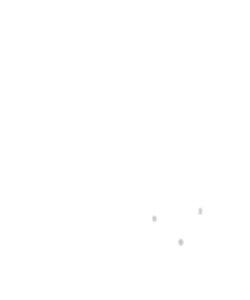

In [ ]:
#Input
INPUTh=[];INPUTn=[]
for i in range(90):
  x='c1('+str(i+1)+').JPG'
  INPUTh.append(x)
for i in range(90):
  y='c2('+str(i+1)+').JPG'
  INPUTn.append(y)
#Train
x_train=[];y_train=[];
for i in range(len(INPUTh)):
  img=Image.open(INPUTh[i])
  h=300;w=250
  re=img.resize((w,h)).convert('LA')
  num=asarray(re)
  comb=num[0:,0:,0]
  kernel = np.ones((3,3),np.float32)/8
  dst = cv.filter2D(comb,-1,kernel)
  #retgone,th1 = cv.threshold(dst,200,255,cv.THRESH_BINARY)
  #plt.imshow(dst,cmap='gray',vmin=0,vmax=255)
  a=dst.reshape(1,h*w)
  x_train.extend(a)
  y_train.append(1) #above
for i in range(len(INPUTn)):
  img=Image.open(INPUTn[i])
  re=img.resize((w,h)).convert('LA')
  num=asarray(re)
  comb=num[0:,0:,0]
  #print(len(comb))
  kernel = np.ones((3,3),np.float32)/8
  dst = cv.filter2D(comb,-1,kernel)
  #retgone1,th1 = cv.threshold(dst,200,255,cv.THRESH_BINARY)
  a=dst.reshape(1,h*w)
  x_train.extend(a)
  y_train.append(0) #under
cv2_imshow(dst)
#print(num)
#print(comb)
#print(a)

# Input

Total Frame :  287.0 frame


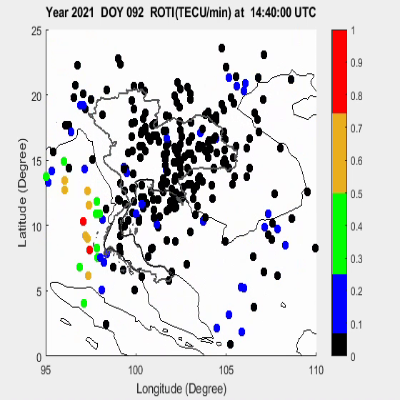

Frame size:  (300, 250)


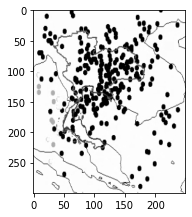

In [ ]:
capturee = cv.VideoCapture(input2[0])
frame_count = capturee.get(cv.CAP_PROP_FRAME_COUNT)
F = []

for i in range(int(frame_count)):
    ret,frame = capturee.read()
    resize = cv.resize(frame,(400,400))
    F.append(resize)
print('Total Frame : ',frame_count,'frame')
plt.subplot(1,2,1)
cv2_imshow(F[175])
framie = F[175][55:355,55:305,1]
print('Frame size: ',framie.shape)
plt.imshow(framie,cmap='gray')

(300, 250)


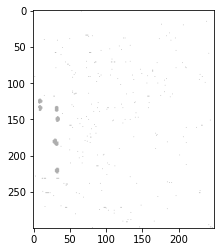

In [ ]:
#print(F[165][0:,50:445,0])
#print(F[165][0:,50:445,0].shape)
for y in range(framie.shape[0]):
  for x in range(framie.shape[1]):
    if framie[y:y+1,x:x+1]>180 or framie[y:y+1,x:x+1]<170 :
      framie[y:y+1,x:x+1] = 255
#print(framie)
plt.imshow(framie,cmap='gray',vmin=0,vmax=255)
#print(framie)
print(framie.shape)

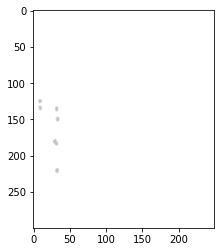

In [ ]:
kernel = np.ones((3,3),np.float32)/8
dst = cv.filter2D(framie,-1,kernel)
plt.imshow(dst,cmap='gray',vmin=0,vmax=255)
x_test=[];
a=dst.reshape(1,h*w)
x_test.extend(a)

# Optimize parameters

In [ ]:
#Input
INPUTh1=[];INPUTn1=[]
for i in range(10):
  x='c1('+str(i+91)+').JPG'
  INPUTh1.append(x)
for i in range(10):
  y='c2('+str(i+91)+').JPG' #2 change to +91
  INPUTn1.append(y)
#Train
x_test=[];
for i in range(len(INPUTh1)):
  img=Image.open(INPUTh1[i])
  h=300;w=250
  re=img.resize((w,h)).convert('LA')
  num=asarray(re)
  comb=num[0:,0:,0]
  kernel = np.ones((3,3),np.float32)/8
  dst = cv.filter2D(comb,-1,kernel)
  #retgone,th1 = cv.threshold(dst,200,255,cv.THRESH_BINARY)
  #plt.imshow(dst,cmap='gray',vmin=0,vmax=255)
  a=dst.reshape(1,h*w)
  x_test.extend(a)#first 10 pictures is class1
for i in range(len(INPUTn1)):
  img=Image.open(INPUTn1[i])
  re=img.resize((w,h)).convert('LA')
  num=asarray(re)
  comb=num[0:,0:,0]
  kernel = np.ones((3,3),np.float32)/8
  dst = cv.filter2D(comb,-1,kernel)
  #retgone,th1 = cv.threshold(dst,200,255,cv.THRESH_BINARY)
  a=dst.reshape(1,h*w)
  x_test.extend(a) #first 10 pictures is class0 

# SVM

In [ ]:
#SVM
x_train = np.nan_to_num(x_train)
x_test= np.nan_to_num(x_test)
#RBF = SVC(kernel='rbf',C=0.5,gamma=0.001)
#RBF.fit(x_train,y_train)
Linear = SVC(kernel='linear',C=0.01) #c less is the best
Linear.fit(x_train,y_train)
#result
#y_predRBF = RBF.predict(x_test)
#print('RBF    ',y_predRBF)
y_predL = Linear.predict(x_test)
print('Linear ',y_predL)
Poly = SVC(kernel='poly',C=0.01)
Poly.fit(x_train,y_train)
y_predPoly = Poly.predict(x_test)
print('Poly   ',y_predPoly)

Linear  [0]
Poly    [0]


# Input for extra

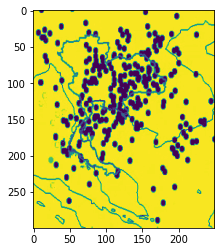

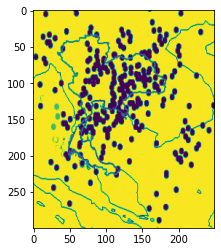

In [ ]:
capturee = cv.VideoCapture(input2[0])
frame_count = capturee.get(cv.CAP_PROP_FRAME_COUNT)
F = []

for i in range(int(frame_count)):
    ret,frame = capturee.read()
    resize = cv.resize(frame,(400,400))
    F.append(resize)

framie=[]
for i in range(26):
  frameen = F[i+173][55:355,55:305,1]
  framie.append(frameen)
plt.imshow(framie[0])
plt.show()
plt.imshow(framie[1])
for i in range(26):
  for y in range(frameen.shape[0]):
    for x in range(frameen.shape[1]):
      if framie[i][y:y+1,x:x+1]>180 or framie[i][y:y+1,x:x+1]<170 :
        framie[i][y:y+1,x:x+1] = 255
x_test=[];
for i in range(26):
  kernel = np.ones((3,3),np.float32)/8
  dst = cv.filter2D(framie[i],-1,kernel)
  h=300;w=250
  a=dst.reshape(1,h*w)
  x_test.extend(a)
#print(len(x_test))
#print(x_test)



# extra

In [ ]:
#SVM
x_train = np.nan_to_num(x_train)
x_test= np.nan_to_num(x_test)
Linear = SVC(kernel='linear',C=0.01) #c less is the best
Linear.fit(x_train,y_train)
Poly = SVC(kernel='poly',C=0.01)
Poly.fit(x_train,y_train)

#result
y_predL = Linear.predict(x_test)
y_predPoly = Poly.predict(x_test)
print('Linear ',y_predL)
print('Poly   ',y_predPoly)

Linear  [0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0]
Poly    [0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0]


In [ ]:
for i in range(len(y_predL)-1):
  if y_predL[i]<y_predL[i+1]:
    print('upstair')
  if y_predL[i]>y_predL[i+1]:
    print('downstair')
  if y_predL[i]==y_predL[i+1]:
    print('stable')
print()
for i in range(len(y_predPoly)-1):
  if y_predPoly[i]<y_predPoly[i+1]:
    print('upstair')
  if y_predPoly[i]>y_predPoly[i+1]:
    print('downstair')
  if y_predPoly[i]==y_predPoly[i+1]:
    print('stable')

upstair
stable
stable
stable
stable
downstair
upstair
stable
stable
stable
stable
stable
stable
downstair
stable
stable
stable
stable
stable
stable
stable
stable
upstair
downstair
stable

upstair
stable
stable
stable
stable
downstair
upstair
stable
stable
stable
stable
stable
stable
downstair
stable
stable
stable
stable
stable
stable
stable
stable
upstair
downstair
stable
